# Statistical analysis of water discharge of surface streams

### Task:
* find a dataset about a river's water level
* analyse the various timeseries data by fitting the right/suitable distribution onto it.
* draw some conclusions about the weather near the river/measurement station



### A list of statistical distributions
Fermi-Dirac statistics, Bose-Einstein statistics, Maxwell-Boltzmann distribution, Planck’s law
Binomial distribution
* number of successes of n independent experiments
Cauchy distribution
* ration of normally distributed variables
* shape of spectral lines
Gamma distribution
Geometric distribution
* number of trials before the first success in Bernoulli trials
Chi-squared distribution
* sum of squares of independent standard normal variables
* how to construct confidence intervals
 
Exponential distribution
Gumbel distribution
* expectation value of the maximum/minimum of samples drawn from a parent distribution with exp tail
* Lévy distribution
* heavy-tailed distribution

Logistic distribution
 
* categorical dependent variables
* logistic regression
 
Log normal distribution
 
* product of many independent variables
* size distribution of particles
 
Normal distribution
 
Pareto distribution
* heavy-tailed, decreasing power-law
* degree distribution of social networks
 
Poisson distribution
 
Student t
 
* average of a normally distributed population
* n is small
Uniform distribution
Weibull distribution
 * any of n iid variables being above a certain limit
* first failure of a system of n identical components

## Excercise 1

For the purposes of the current excercises, select a stream from a rainy area with relatively small discharge so that the effect of short but strong storms is visible. Good choices are small rivers from the north-eastern US, e.g. site 01589440. First experiment with a smaller dataset, for example one year long series, but at the end **retrieve at least 10 years of data**.

Large amounts of historical surface water data are available from the United States Geological Survey (USGS) at https://waterdata.usgs.gov/nwis The goal of the project is to retrieve samples from the web interface manually, and then later  automate the process by calling the web service as described at https://help.waterdata.usgs.gov/faq/automated-retrievals.

The service is explained in more detail here: https://waterservices.usgs.gov/docs/site-service/site-service-details/.
#### or

Find a database of historic water level measurement of a large river such as the Danube at Budapest!

In [1]:
import pandas as pd
import os

In [2]:
import requests

# Define the URL for the USGS API
url = "https://nwis.waterdata.usgs.gov/nwis/uv/"

# Define the parameters for the request
params = {
    "format": "rdb",
    "site_no": "01589440",
    "parameterCd": "00065",  # Water level parameter code
    "begin_date" : "20180101",
    "end_date" : "20191231",
    "siteStatus": "all"
}

# Send the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Extract the data from the response
    data = response.text
    # Process the data as needed
    # ...
else:
    print("Error: Failed to retrieve data from the USGS server.")
    print("Status code:", response.status_code)
    print()


In [4]:
!ls /v/courses/2025-202425adatexplorcisvizualizci.assignments/

/v/wfct0p/data-ex-vis/Assignments/Timeseries


In [68]:
dirname = f"/v/courses/2025-202425adatexplorcisvizualizci.assignments/timeseries/"

In [50]:
with open(dirname+"water_level_data.txt", "w") as file:
    file.write(data)

In [78]:
#load water_level_data.txt into a pandas dataframe, use dateime as date column, treat comments with "#", skiprow 30, and use tab as delimiter
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv(dirname+"water_level_data.txt", comment="#", skiprows=[30], parse_dates=["datetime"], delimiter="\t")

# Display the DataFrame
df.head()


,agency_cd,site_no,datetime,tz_cd,69744_00060,69744_00060_cd,69745_00065,69745_00065_cd
0,USGS,1589440,2010-01-01 00:00:00,EST,58.2,A,3.87,A
1,USGS,1589440,2010-01-01 00:15:00,EST,58.2,A,3.87,A
2,USGS,1589440,2010-01-01 00:30:00,EST,59.3,A,3.88,A
3,USGS,1589440,2010-01-01 00:45:00,EST,59.3,A,3.88,A
4,USGS,1589440,2010-01-01 01:00:00,EST,59.3,A,3.89,A


In [79]:
#use the loaded df DataFrame and rename columns 69744_00060 and 69745_00065 to water_discharge and gage_height, respectively
df = df.rename(columns={'69744_00060': 'water_discharge', '69745_00065': 'gage_height'})


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349753 entries, 0 to 349752
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   agency_cd        349753 non-null  object        
 1   site_no          349753 non-null  int64         
 2   datetime         349753 non-null  datetime64[ns]
 3   tz_cd            349753 non-null  object        
 4   water_discharge  334535 non-null  float64       
 5   69744_00060_cd   334535 non-null  object        
 6   gage_height      349727 non-null  float64       
 7   69745_00065_cd   349727 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.3+ MB


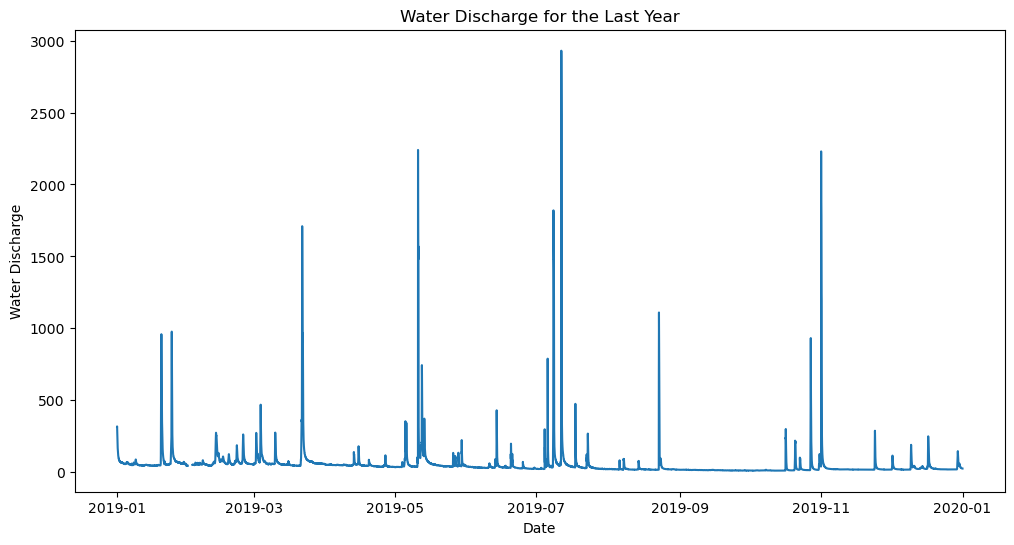

## Excercise 2

Load the downloaded data file into the processing environment paying attention to handling time stamps and perfoming the necessary data type conversions (converting dates to floating point numbers such as unix time stamp or julian date sometimes makes handling time series easier). Plot the data for a certain interval to show that the effect of storms is clearly visible!

## Excercise 3

Plot the histogram of water discharge values. Fit the data with an appropriate distribution function and bring arguments in favor of the choice of function!

## Excercise 4

In case of small streams, storms and passing weather fronts with rain can significantly increase water discharge on a short time scale. Develop a simple algorithm to detect rainy events in the data. Plot the original time series and mark rainy events!

## Excercise 5

Water discharge increases significantly during rain producing maxima in the time series. Plot the distribution of maximum values and fit with an appropriate function. Bring arguments to support the choice of probabilistic model!

## Excercise 6

Once rainy events are detected, plot the distribution of the length of sunny intervals between rains. Fit the distribution with an appropriate function!

## Excercise 7

What is the maximum of water discharge in an arbitrarily chosen period of one year? Calculate the maximum of water discharge due to rain in a rolling window of 1 year, plot its distribution and fit with an appropriate function!

## Excercise 8

How many time does it rain in a month? (Again use a rolling window function) Calculate and plot the distribution and fit with an appropriate function!

## Excercise 9

Find the measuring station you used in the excercises above on the map. Find another measurement station about 100-200 kms from it and download the data! Try to estimate the typical time it takes for weather fronts to travel the distance between the two measuring stations!